# PROJECT HOUSE PRICE PREDICTION BAHRIA TOWN

## IMPORTING LIBRARIES

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#show all columns of a dataset
pd.pandas.set_option('display.max_columns',None)


## LOADING DATASETS

In [43]:
df = pd.read_csv('dsproject1.csv', na_values=['-'])
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,House,PKR1.45 Crore,"Bahria Town Karachi, Karachi, Sindh",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Flat,PKR75 Lakh,"Bahria Town Karachi, Karachi, Sindh",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,House,PKR3.75 Crore,"Bahria Town Karachi, Karachi, Sindh",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Not Found,Main FeaturesBuilt in year: 2024Parking Spaces...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,NaN,NaN,NaN
4211,House,PKR1.75 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,NaN,NaN,NaN
4212,House,PKR2.7 Crore,"Bahria Town Karachi, Karachi, Sindh",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,NaN,NaN,NaN
4213,House,PKR5.1 Crore,"Bahria Town Karachi, Karachi, Sindh",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,NaN,NaN,NaN


## CLEANING AND REMOVING MISSING VALUES

In [44]:
forth_column = df.iloc[:, 3]  # Gets all rows for the fourth column (index starts at 0)
counts = forth_column.value_counts()
print(counts)

3                    1159
2                     524
4                     341
1                     157
5                     125
                     ... 
PKR83.05 Thousand       1
PKR10.5 Lakh            1
PKR1.95 Lakh            1
PKR3.37 Lakh            1
PKR3.89 Lakh            1
Name: Bath, Length: 79, dtype: int64


In [45]:
df = df[df["Bath"].str.contains("PKR") == False]
df = df.astype({'Bath':'int'})
value=df['Bath'].mean()
value1=df['Bedrooms'].mean()

mean_value=round(value)
mean_value1=round(value1)

print("Mean of Bath: ",mean_value)
print("Mean of Bed: ",mean_value1)

df['Bath'].fillna(value=mean_value, inplace=True)
df['Bedrooms'].fillna(value=mean_value1, inplace=True)

Mean of Bath:  3
Mean of Bed:  3


In [46]:
df.shape

(2351, 13)

In [47]:
df.isnull()

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,False,False,False,False,False,False,False,False,False,False,True,True,True
4211,False,False,False,False,False,False,False,False,False,False,True,True,True
4212,False,False,False,False,False,False,False,False,False,False,True,True,True
4213,False,False,False,False,False,False,False,False,False,False,True,True,True


In [48]:
df.isnull().sum()

Type                0
Price               0
Location            0
Bath                0
Area                0
Purpose             0
Bedrooms            0
Added               0
Precinct            0
Main Features      16
Unnamed: 10      2351
Unnamed: 11      2351
Unnamed: 12      2351
dtype: int64

In [49]:
df.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features
0,House,PKR1.45 Crore,"Bahria Town Karachi, Karachi, Sindh",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...
2,Flat,PKR75 Lakh,"Bahria Town Karachi, Karachi, Sindh",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...
4,House,PKR3.75 Crore,"Bahria Town Karachi, Karachi, Sindh",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Not Found,Main FeaturesBuilt in year: 2024Parking Spaces...
6,House,PKR1.4 Crore,"Bahria Town Karachi, Karachi, Sindh",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Not Found,Main FeaturesParking Spaces: 1FlooringElectric...
8,House,PKR1.75 Crore,"Bahria Town Karachi, Karachi, Sindh",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...
...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...
4211,House,PKR1.75 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...
4212,House,PKR2.7 Crore,"Bahria Town Karachi, Karachi, Sindh",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...
4213,House,PKR5.1 Crore,"Bahria Town Karachi, Karachi, Sindh",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...


In [50]:
df = df.dropna()

In [51]:
df.isna().values.any()

False

In [52]:
df = df.replace(to_replace= 'Not Found', value = 'Bahria Town')
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features
0,House,PKR1.45 Crore,"Bahria Town Karachi, Karachi, Sindh",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...
2,Flat,PKR75 Lakh,"Bahria Town Karachi, Karachi, Sindh",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...
4,House,PKR3.75 Crore,"Bahria Town Karachi, Karachi, Sindh",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...
6,House,PKR1.4 Crore,"Bahria Town Karachi, Karachi, Sindh",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...
8,House,PKR1.75 Crore,"Bahria Town Karachi, Karachi, Sindh",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...
...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...
4211,House,PKR1.75 Crore,"Bahria Town Karachi, Karachi, Sindh",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...
4212,House,PKR2.7 Crore,"Bahria Town Karachi, Karachi, Sindh",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...
4213,House,PKR5.1 Crore,"Bahria Town Karachi, Karachi, Sindh",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...


In [53]:
df = df.replace(to_replace= 'Bahria Town Karachi, Karachi, Sindh', value = 'Bahria Town, Karachi')
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...
...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...
4211,House,PKR1.75 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...
4212,House,PKR2.7 Crore,"Bahria Town, Karachi",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...
4213,House,PKR5.1 Crore,"Bahria Town, Karachi",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...


In [54]:
# new data frame with split value columns
new = df["Area"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
df["Total Area"]= new[0]
 
# making separate last name column from new data frame
df["Sq. Yds"]= new[1]



# df['Area'] = df['Area'].str.replace(r'\D', '')

In [55]:
# Dropping old Name columns
df.drop(columns =["Sq. Yds"], inplace = True)
 
# df display
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200
...,...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152
4211,House,PKR1.75 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152
4212,House,PKR2.7 Crore,"Bahria Town, Karachi",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350
4213,House,PKR5.1 Crore,"Bahria Town, Karachi",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500


In [56]:
df.head()

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200


First We'll split PKR and other value in 2 columns

Then try changing work to number


In [57]:
# new data frame with split value columns
new = df["Price"].str.split("PKR", n = 1, expand = True)
 
# making separate first name column from new data frame
df["PKR"]= new[0]
 
# making separate last name column from new data frame
df["New Price"]= new[1]

In [58]:
df.head()

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,PKR,New Price
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,,1.45 Crore
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,,75 Lakh
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,,3.75 Crore
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,,1.4 Crore
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,,1.75 Crore


In [59]:
# Dropping old Name columns
df.drop(columns =["PKR"], inplace = True)
 
# df display
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,New Price
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,1.45 Crore
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,75 Lakh
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,3.75 Crore
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,1.4 Crore
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,1.75 Crore
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.9 Crore
4211,House,PKR1.75 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.75 Crore
4212,House,PKR2.7 Crore,"Bahria Town, Karachi",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350,2.7 Crore
4213,House,PKR5.1 Crore,"Bahria Town, Karachi",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500,5.1 Crore


In [60]:
new = df["New Price"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
df["Price Digit"]= new[0]
 
# making separate last name column from new data frame
df["Words"]= new[1]

In [61]:
df.head()

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,New Price,Price Digit,Words
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,1.45 Crore,1.45,Crore
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,75 Lakh,75,Lakh
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,3.75 Crore,3.75,Crore
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,1.4 Crore,1.4,Crore
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,1.75 Crore,1.75,Crore


In [62]:
df = df.replace(to_replace= 'Lakh', value = '100000')
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,New Price,Price Digit,Words
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,1.45 Crore,1.45,Crore
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,75 Lakh,75,100000
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,3.75 Crore,3.75,Crore
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,1.4 Crore,1.4,Crore
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,1.75 Crore,1.75,Crore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.9 Crore,1.9,Crore
4211,House,PKR1.75 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.75 Crore,1.75,Crore
4212,House,PKR2.7 Crore,"Bahria Town, Karachi",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350,2.7 Crore,2.7,Crore
4213,House,PKR5.1 Crore,"Bahria Town, Karachi",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500,5.1 Crore,5.1,Crore


In [63]:
df = df.replace(to_replace= 'Crore', value = '10000000')
df

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,New Price,Price Digit,Words
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,1.45 Crore,1.45,10000000
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,75 Lakh,75,100000
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,3.75 Crore,3.75,10000000
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,1.4 Crore,1.4,10000000
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,1.75 Crore,1.75,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,House,PKR1.9 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.9 Crore,1.9,10000000
4211,House,PKR1.75 Crore,"Bahria Town, Karachi",3,152 Sq. Yd.,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152,1.75 Crore,1.75,10000000
4212,House,PKR2.7 Crore,"Bahria Town, Karachi",4,350 Sq. Yd.,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350,2.7 Crore,2.7,10000000
4213,House,PKR5.1 Crore,"Bahria Town, Karachi",5,500 Sq. Yd.,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500,5.1 Crore,5.1,10000000


In [64]:
df["Price Digit"] = pd.to_numeric(df["Price Digit"])
df["Price Digit"].apply(type).value_counts()

<class 'float'>    2335
Name: Price Digit, dtype: int64

In [65]:
df["Words"] = pd.to_numeric(df["Words"])
df["Words"].apply(type).value_counts()

<class 'int'>    2335
Name: Words, dtype: int64

In [66]:
df['Total Price'] = df['Price Digit'].mul(df['Words'])

In [67]:
df.head()

,Type,Price,Location,Bath,Area,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,New Price,Price Digit,Words,Total Price
0,House,PKR1.45 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,1.45 Crore,1.45,10000000,14500000.0
2,Flat,PKR75 Lakh,"Bahria Town, Karachi",3,106 Sq. Yd.,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,75 Lakh,75.00,100000,7500000.0
4,House,PKR3.75 Crore,"Bahria Town, Karachi",6,500 Sq. Yd.,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,3.75 Crore,3.75,10000000,37500000.0
6,House,PKR1.4 Crore,"Bahria Town, Karachi",3,125 Sq. Yd.,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,1.4 Crore,1.40,10000000,14000000.0
8,House,PKR1.75 Crore,"Bahria Town, Karachi",3,200 Sq. Yd.,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,1.75 Crore,1.75,10000000,17500000.0


In [68]:
df.iloc[:, 13].value_counts() # Gets all rows for the fourth column (index starts at 0)

10000000    1815
100000       520
Name: Words, dtype: int64

In [69]:
# Dropping old Name columns
df.drop(columns =["New Price" , "Price Digit", "Words", "Price", "Area"], inplace = True)
 
# df display
df

,Type,Location,Bath,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,Total Price
0,House,"Bahria Town, Karachi",3,For Sale,3.0,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,14500000.0
2,Flat,"Bahria Town, Karachi",3,For Sale,2.0,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,7500000.0
4,House,"Bahria Town, Karachi",6,For Sale,5.0,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,37500000.0
6,House,"Bahria Town, Karachi",3,For Sale,3.0,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,14000000.0
8,House,"Bahria Town, Karachi",3,For Sale,3.0,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,17500000.0
...,...,...,...,...,...,...,...,...,...,...
4210,House,"Bahria Town, Karachi",3,For Sale,3.0,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152,19000000.0
4211,House,"Bahria Town, Karachi",3,For Sale,3.0,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152,17500000.0
4212,House,"Bahria Town, Karachi",4,For Sale,4.0,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350,27000000.0
4213,House,"Bahria Town, Karachi",5,For Sale,5.0,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500,51000000.0


In [70]:
df['Bedrooms'] = df['Bedrooms'].astype(int)

In [71]:
df

,Type,Location,Bath,Purpose,Bedrooms,Added,Precinct,Main Features,Total Area,Total Price
0,House,"Bahria Town, Karachi",3,For Sale,3,3 hours ago,Precinct 12,Main FeaturesBuilt in year: 2022Parking Spaces...,125,14500000.0
2,Flat,"Bahria Town, Karachi",3,For Sale,2,4 hours ago,Precinct 19,Main FeaturesBuilt in year: 2022Parking Spaces...,106,7500000.0
4,House,"Bahria Town, Karachi",6,For Sale,5,5 hours ago,Bahria Town,Main FeaturesBuilt in year: 2024Parking Spaces...,500,37500000.0
6,House,"Bahria Town, Karachi",3,For Sale,3,1 day ago,Bahria Town,Main FeaturesParking Spaces: 1FlooringElectric...,125,14000000.0
8,House,"Bahria Town, Karachi",3,For Sale,3,1 day ago,Precinct 10-A,Main FeaturesBuilt in year: 2022Parking Spaces...,200,17500000.0
...,...,...,...,...,...,...,...,...,...,...
4210,House,"Bahria Town, Karachi",3,For Sale,3,3 weeks ago,Precinct 11-A,Main FeaturesParking Spaces: 1FlooringElectric...,152,19000000.0
4211,House,"Bahria Town, Karachi",3,For Sale,3,3 weeks ago,Precinct 11-B,Main FeaturesParking Spaces: 1FlooringElectric...,152,17500000.0
4212,House,"Bahria Town, Karachi",4,For Sale,4,3 weeks ago,Sports City,Main FeaturesParking Spaces: 1FlooringElectric...,350,27000000.0
4213,House,"Bahria Town, Karachi",5,For Sale,5,3 weeks ago,Bahria Paradise,Main FeaturesParking Spaces: 1FlooringElectric...,500,51000000.0


In [72]:
df.to_csv("FinalDataset.csv", index=False)

## VISUALIZATIONS

In [73]:
print(df.columns.tolist())

['Type', 'Location', 'Bath', 'Purpose', 'Bedrooms', 'Added', 'Precinct ', 'Main Features', 'Total Area', 'Total Price']


<AxesSubplot:ylabel='Precinct '>

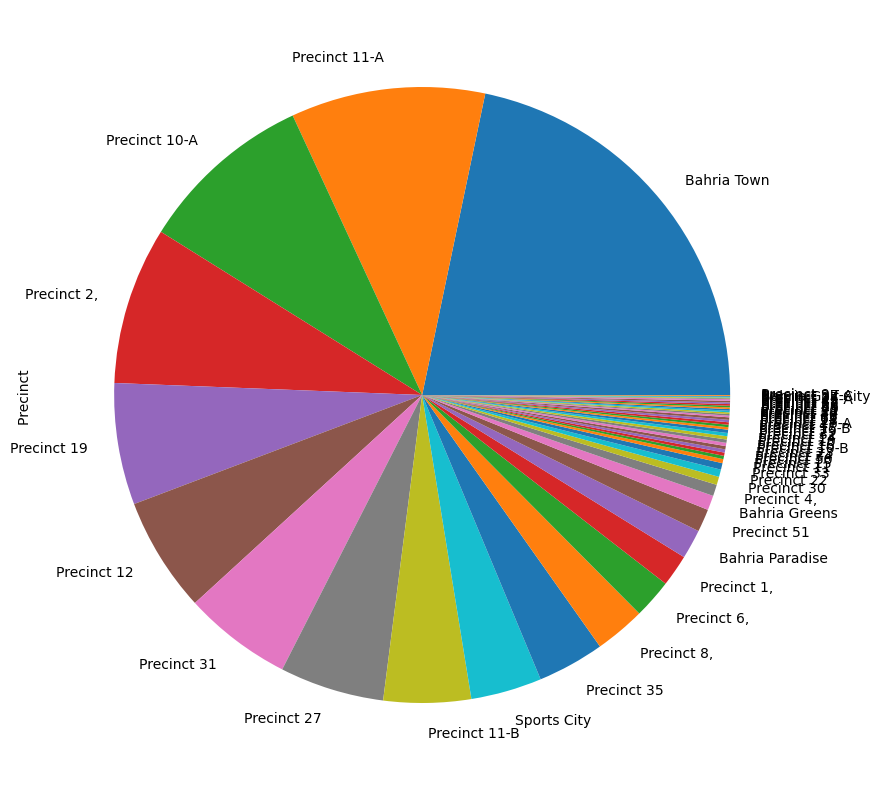

In [74]:
df['Precinct '].value_counts().plot(kind='pie', figsize=(14,10))

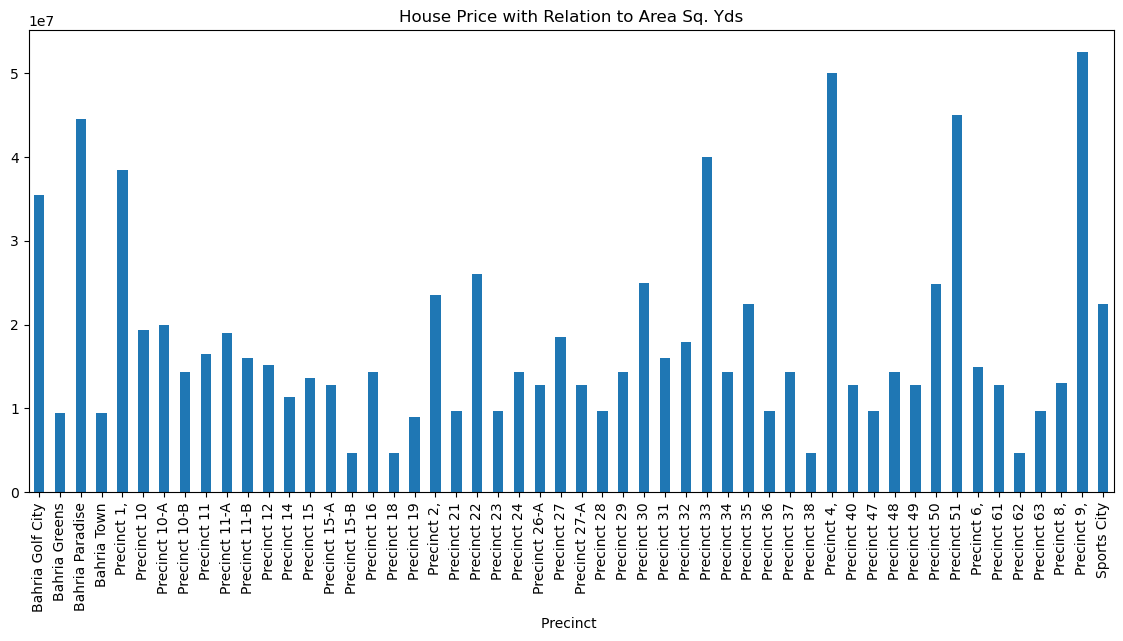

In [75]:
df.groupby('Precinct ')['Total Price'].median().plot(kind="bar", figsize=(14,6))
plt.title("House Price with Relation to Area Sq. Yds")
plt.show()

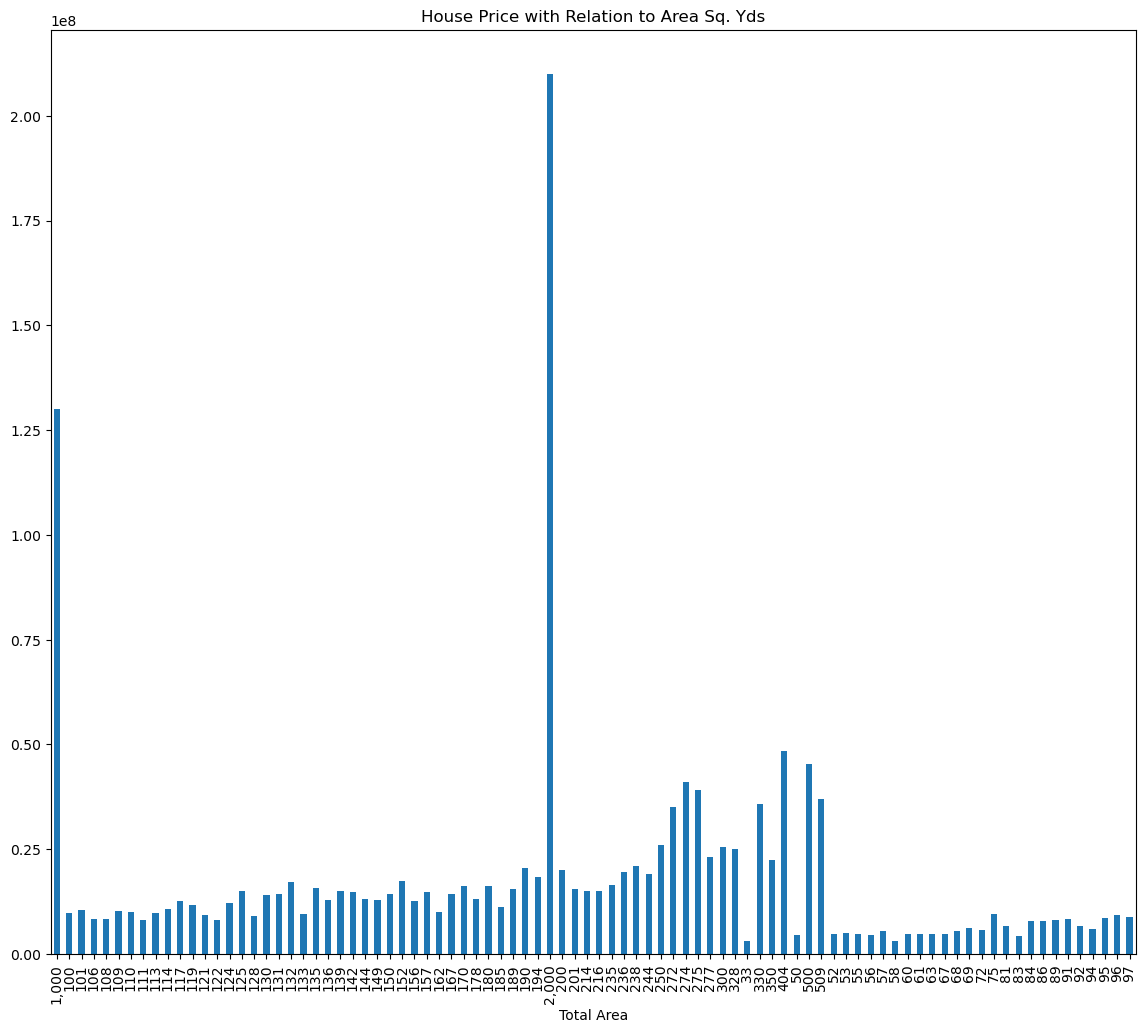

In [76]:
df.groupby('Total Area')['Total Price'].median().plot(kind="bar", figsize=(14,12))
plt.title("House Price with Relation to Area Sq. Yds")
plt.show()

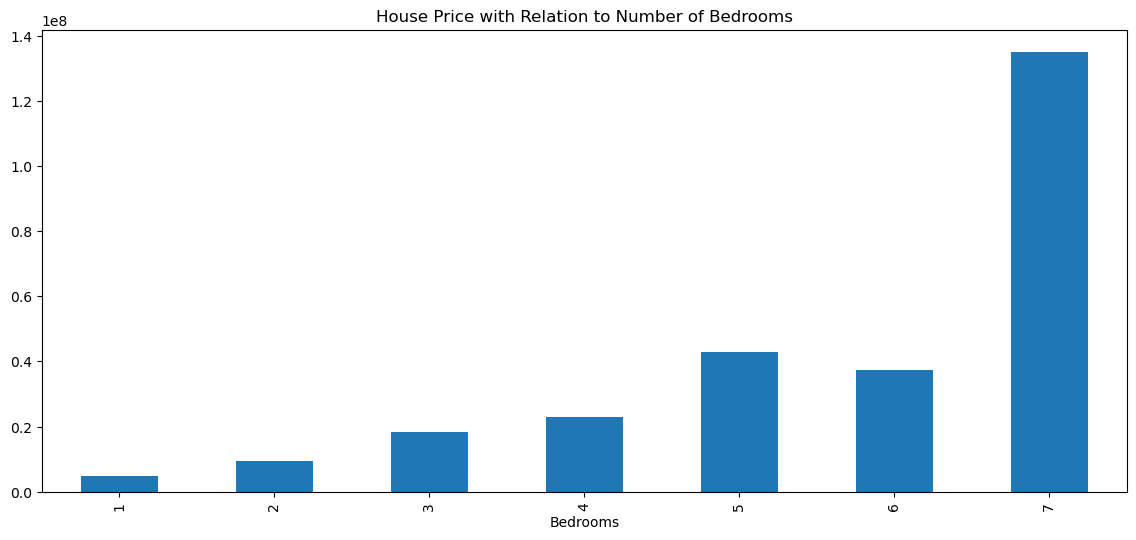

In [77]:
df.groupby('Bedrooms')['Total Price'].median().plot(kind="bar", figsize=(14,6))
plt.title("House Price with Relation to Number of Bedrooms")
plt.show()

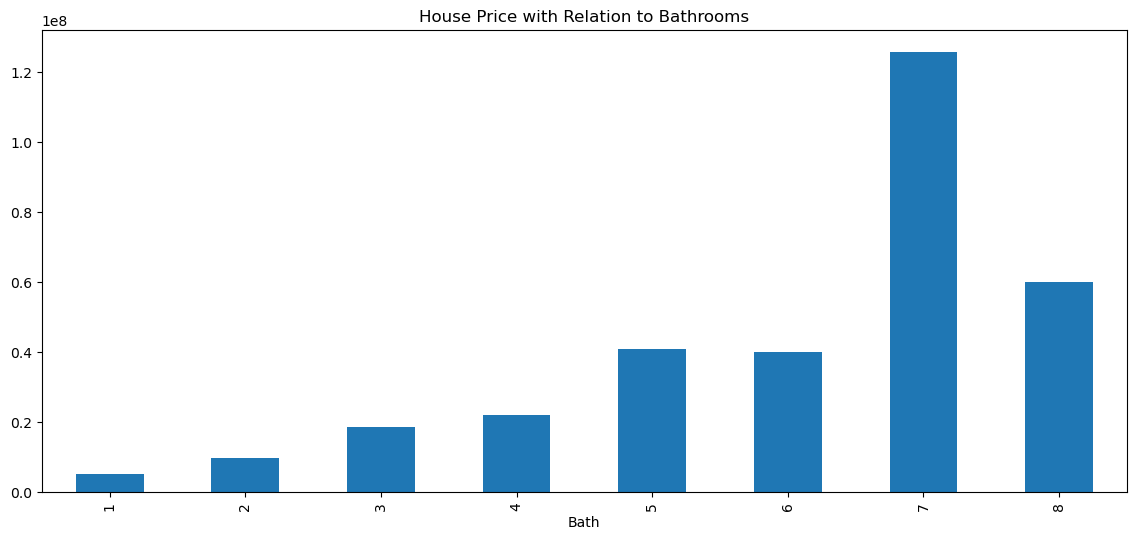

In [78]:
df.groupby('Bath')['Total Price'].median().plot(kind="bar", figsize=(14,6))
plt.title("House Price with Relation to Bathrooms")
plt.show()

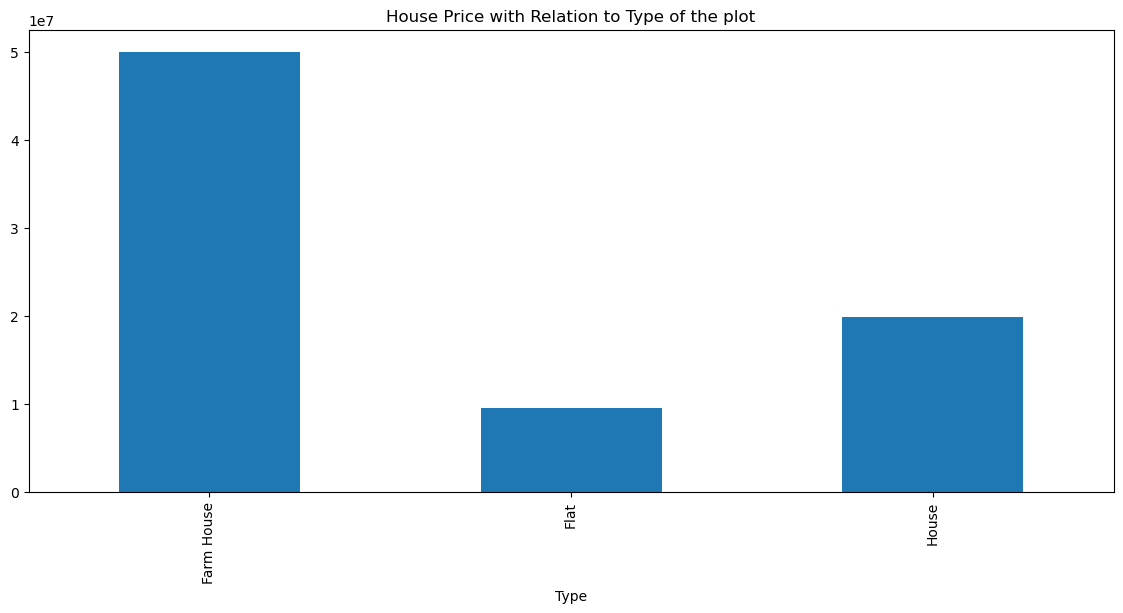

In [79]:
df.groupby('Type')['Total Price'].median().plot(kind="bar", figsize=(14,6))
plt.title("House Price with Relation to Type of the plot")
plt.show()